In [2]:
import pandas as pd
import numpy as np
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from fbprophet import Prophet

In [ ]:
# conda install -c conda-forge fbprophet

In [ ]:
# conda install gcc

### Facebook Profit Analysis 

Using Facebook profit for time series predictions.  This data is hourly over 1 year compared to the Arima EDA notebook I expect this model will be much more accurate. Profit is good for daily, weekly, yearly and holiday trends. I will start off with some EDA since this new Data Set has hourly data 

In [4]:
# A look at the power Date Frame 
power = pd.read_csv('power.csv')
power.head()


,Date,powera,powerb,powertotal
0,2018-11-14 14:17:00,541105.875,1039355.750,1580461.625
1,2018-11-14 15:17:00,1002934.938,1054349.500,2057284.438
2,2018-11-14 16:17:00,541169.500,1026370.313,1567539.813
3,2018-11-14 17:17:00,424117.500,1022280.938,1446398.438
4,2018-11-14 18:17:00,555347.125,1029418.938,1584766.063


In [5]:
# converting Date column to datetime and making it the index
power['Date'] = pd.to_datetime(power['Date'])
power.set_index('Date', inplace=True) 
power['Hour'] = power.index.strftime('%H')
power.head()

,powera,powerb,powertotal,Hour
Date,,,,
2018-11-14 14:17:00,541105.875,1039355.750,1580461.625,14
2018-11-14 15:17:00,1002934.938,1054349.500,2057284.438,15
2018-11-14 16:17:00,541169.500,1026370.313,1567539.813,16
2018-11-14 17:17:00,424117.500,1022280.938,1446398.438,17
2018-11-14 18:17:00,555347.125,1029418.938,1584766.063,18


#### Power A Graph 
One year with hourly data 


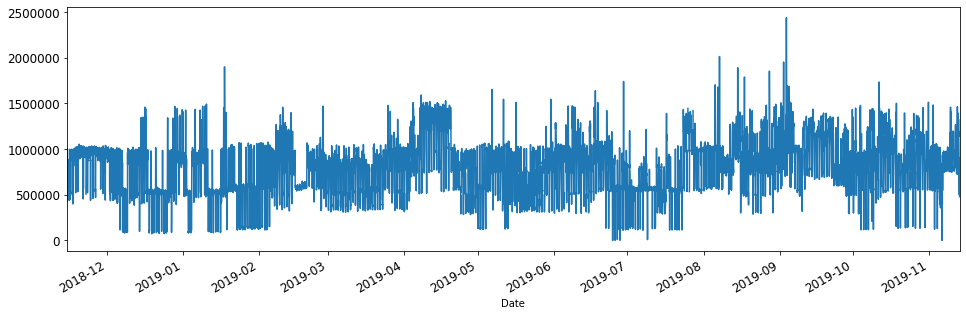

In [6]:
power['powera'].plot(figsize=(16,5), fontsize=12);

#### Power B Graph
One year with hourly data

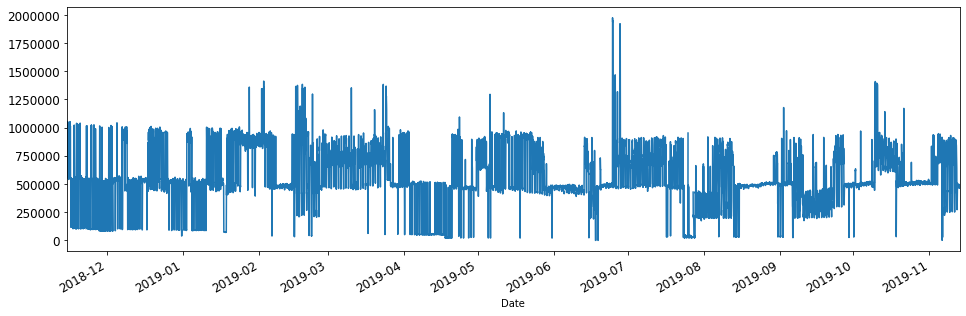

In [7]:
power['powerb'].plot(figsize=(16,5), fontsize=12);

#### Power A + Power B 
One year with hourly data

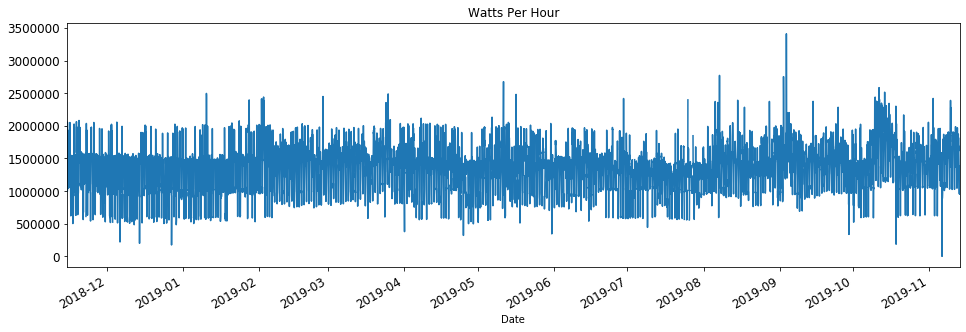

In [8]:
power['powertotal'].plot(figsize=(16,5), fontsize=12, title='Watts Per Hour');

#### Power Usage by hour

Can see a clear dip in power usage from 4-6 A.M. and a spike around 12 - 1 P.M. 

In [9]:
df_power = pd.DataFrame(index=power.index, columns= ('powertotal', 'Hour'))
df_power['powertotal'] = power['powertotal']
df_power['Hour'] = power['Hour']
df_power.index.freq = '1H'

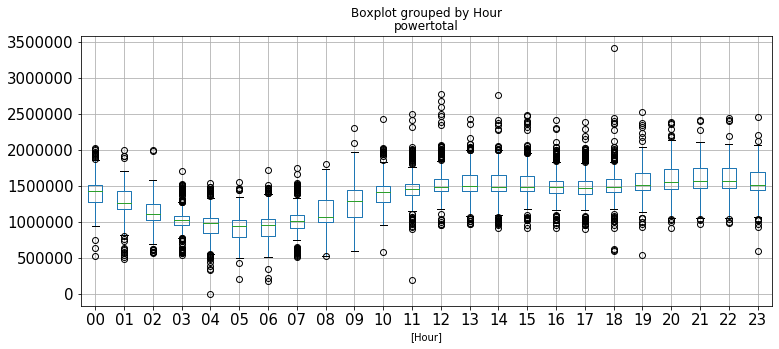

In [10]:
df_power.boxplot(by='Hour',figsize=(12,5), fontsize=15);

#### Average weekly power usage per week 

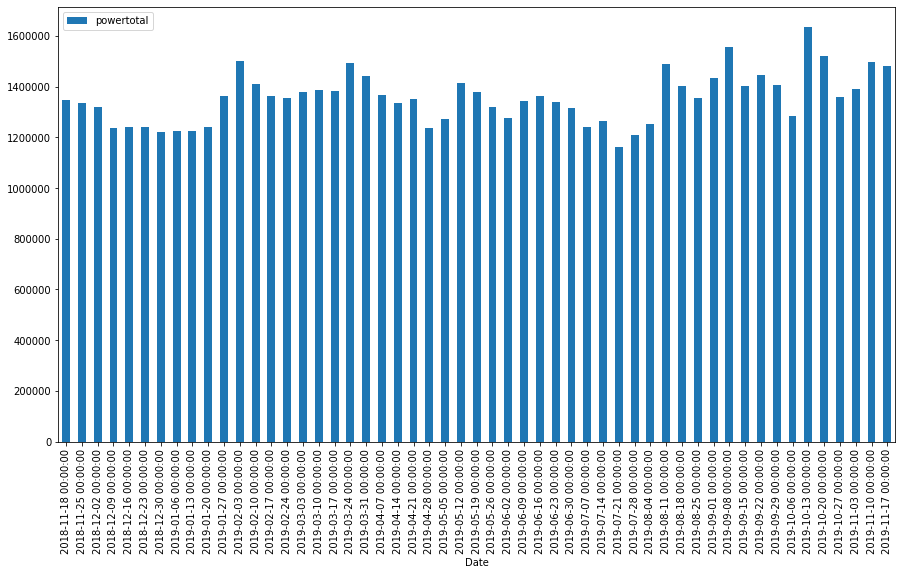

In [11]:
df_power.resample('W').mean().plot.bar(figsize=(15,8))

#### Summed Power usage per week 

A little bit of an uptrend, but not sure if it will be significant 

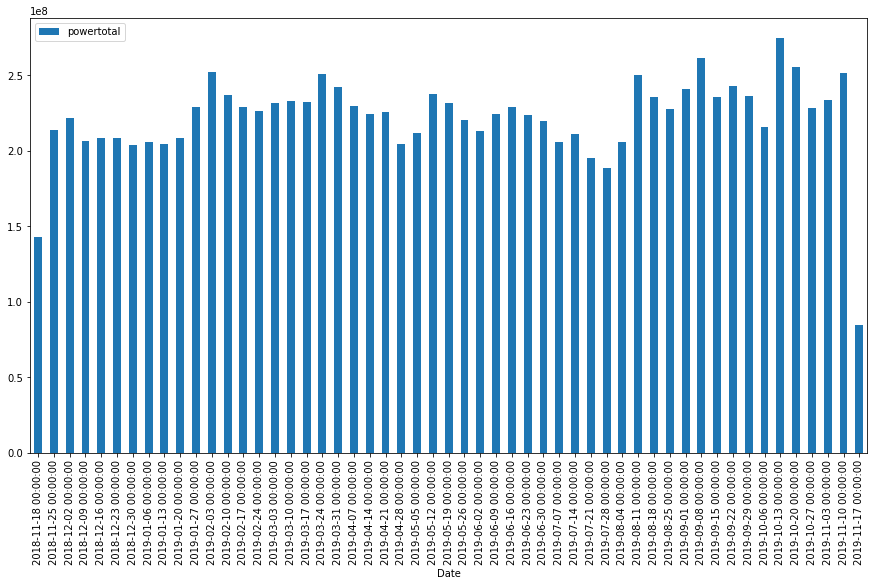

In [12]:
df_power.resample('W').sum().plot.bar(figsize=(15,8))